# MLP: Multilayer Perceptron on handwriting digits recognition 

### import libraries


In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


### load data

In [2]:
(x_train_mlp,y_train_mlp), (x_test_mlp,y_test_mlp) = mnist.load_data()

### compute the number of labels

In [3]:
num_labels = len(np.unique(y_train_mlp))

### sample and plot 25 mnist digits from train dataset

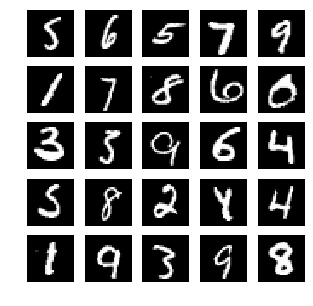

In [4]:
indexes = np.random.randint(0,x_train_mlp.shape[0], size=25)
images = x_train_mlp[indexes]
labels = y_train_mlp[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image = images[i]
    plt.imshow(image,cmap='gray')
    plt.axis('off')

plt.show()
plt.close('all')

### convert to one-hot vector


In [5]:
y_train_mlp = to_categorical(y_train_mlp)
y_test_mlp = to_categorical(y_test_mlp)

### image dimensions (assumed square)

In [6]:
image_size = x_train_mlp.shape[1]
input_size = image_size*image_size

### Resize and normalize. The input is expected to be a 1D tensor. As such, x_train and x_test are reshaped to [60000, 28 * 28] and [10000, 28 * 28], respectively.

In [7]:
x_train_mlp = np.reshape(x_train_mlp, [-1, input_size])
x_train_mlp = x_train_mlp.astype('float32')/255
x_test_mlp = np.reshape(x_test_mlp, [-1, input_size])
x_test_mlp = x_test_mlp.astype('float32')/255

### network parameters

In [8]:
batch_size = 128
hidden_units = 256
dropout = 0.45

### 3-layer MLP model with relu and dropout after each layer

In [9]:
model = Sequential()
model.add(Dense(hidden_units,input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
""" output of one-hot vector"""
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

### compile and train the model

In [10]:
model.compile(optimizer='adamax', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_mlp,y_train_mlp, epochs=20, batch_size=batch_size)
print("\n")

Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.4613 - accuracy: 0.8589
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.2297 - accuracy: 0.9316
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.1792 - accuracy: 0.9473
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.1508 - accuracy: 0.9555
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.1350 - accuracy: 0.9589
Epoch 6/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1199 - accuracy: 0.9637
Epoch 7/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.1105 - accuracy: 0.9658
Epoch 8/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1010 - accuracy: 0.9692
Epoch 9/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0925 - accuracy: 0.9710
Epoch 10/20
60000/60000 [==============================

### validate the model on test dataset to determine generalization

In [12]:
loss_mlp, acc_mlp = model.evaluate(x_test_mlp, y_test_mlp, batch_size=batch_size)
print("\nMLP_TEST ACCURACY: %.1f%%" % (100.0*acc_mlp))
print("\n")

10000/10000 [==============================] - 0s 10us/step

MLP_TEST ACCURACY: 98.2%




### plotting

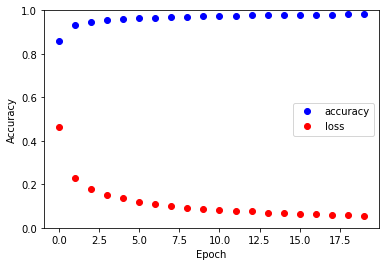

In [14]:
plt.plot(history.history['accuracy'],'bo', label='accuracy')
plt.plot(history.history['loss'], 'ro', label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='center right')
plt.show()